In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [3]:
data = pd.read_csv(r"/content/DOGE-USD.csv")

In [4]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [5]:
data.corr(numeric_only = True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [6]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)

/tmp/ipython-input-1049946071.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)


In [7]:
data.set_index('Date', inplace=True)

In [8]:
data.isnull().any()

,0
Open,True
High,True
Low,True
Close,True
Adj Close,True
Volume,True


In [9]:
data.isnull().sum()

,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'data vs close of 2021')

<Figure size 2000x700 with 0 Axes>

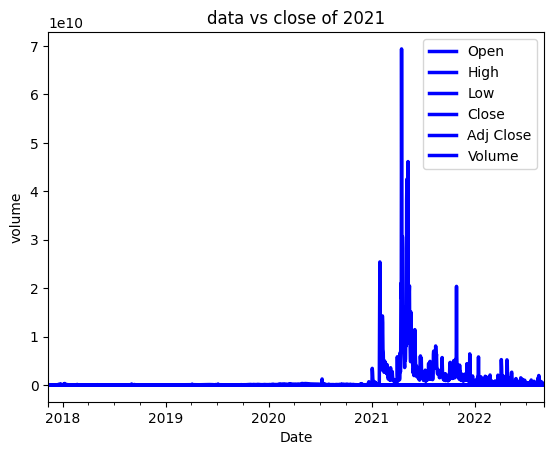

In [11]:
plt.figure(figsize=(20,7))
x = data.groupby("Date").mean()
x.plot(linewidth = 2.5, color = "b")
plt.xlabel("Date")
plt.ylabel("volume")
plt.title("data vs close of 2021")

In [17]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = (data["High"] / data["Volume"])
data["z"] = (data["Low"] / data["Volume"])
data["a"] = (data["High"] / data["Low"])
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending = False))

,Close
Close,1.000000
Adj Close,1.000000
High,0.995104
Low,0.994575
Open,0.992514
Volume,0.588678
b,0.456479
gap,0.383333
a,0.172057
z,0.063251


In [13]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [20]:
data = data[["Close" , "Volume" , "gap" , "a" , "b"]]
data.head(3)

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06


In [25]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

In [26]:
print(train.shape , test.shape)

(11, 5) (19, 5)


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model = SARIMAX(endog=train["Close"], exog=train.drop("Close", axis = 1), order = (2,1,1))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  32.463
Date:                Sat, 13 Sep 2025   AIC                            -48.926
Time:                        19:48:42   BIC                            -46.506
Sample:                    08-06-2022   HQIC                           -51.582
                         - 08-16-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      9.311e-11   3.02e-11      3.085      0.002     3.4e-11    1.52e-10
gap          2.21e-09   4.26e-10      5.190      0.000    1.38e-09    3.04e-09
a             -0.0066   2.11e-14  -3.13e+11      0.0

In [35]:
import numpy as np
import pandas as pd

# Clean the exog data (replace inf with nan, then drop rows with nan)
exog = test.drop("Close", axis=1).replace([np.inf, -np.inf], np.nan).fillna(0)

# Define start and end
start = 11
end = 29

# Run prediction
predictions = result.predict(start=start, end=end, exog=exog)

print(predictions)


2022-08-17    0.077165
2022-08-18    0.075131
2022-08-19    0.074830
2022-08-20    0.073182
2022-08-21    0.073451
2022-08-22    0.073522
2022-08-23    0.073569
2022-08-24    0.073559
2022-08-25    0.073522
2022-08-26    0.073623
2022-08-27    0.073237
2022-08-28    0.073668
2022-08-29    0.073604
2022-08-30    0.073629
2022-08-31    0.073581
2022-09-01    0.073489
2022-09-02    0.073689
2022-09-03    0.081615
2022-09-04    0.073474
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

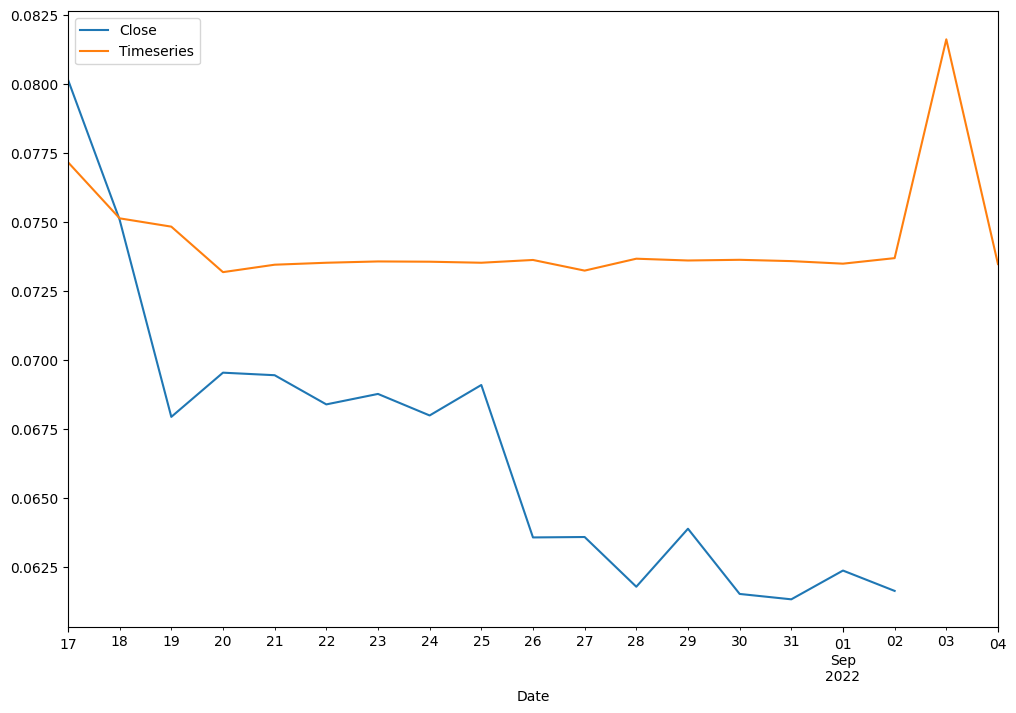

In [36]:
test["Close"].plot(legend=True, figsize=(12,8))
predictions.plot(label="Timeseries", legend=True)